# Relativistische Kinematik

## Die Lorentz-Transformation

Will man zwischen verschiedenen Bezugssystemen hin und herwechseln, so muss man eine Lorentz-Transformation durchfuehren, da die Lorentz-Transformation die konstanz der Lichtgeschwindigkeit in allen Bezugssystemen beruecksichtigt. Damit stellt die Lorentz-Transformation eine Erweiterung der Gallilei-Transformation dar. Im Grenzfall kleiner Relativgeschwindigkeiten wird die Lorentz-Transformation zu der Gallilei-Transformation.

Fuer einen Stationaeres Bezugssystem $S$ und ein relativ zu $S$ bewegtes Bezugssystem $S'$ gilt die Transformation

$$
x=x'\\
y=y'\\
z=\gamma(z'+\beta_zct')\\
ct=\gamma(\beta_zz'+ ct')\\
$$

Im weiteren Verlauf soll zur Verarbeitung symbolischer Ausdruecke die python-bibliothek `sympy` verwendet werden.
Ein ausfuehrliches tutorial zu sympy und eine Funktionsreferenz findet sich unter [hier](https://docs.sympy.org)

In [13]:
from sympy import *
from matplotlib import pyplot as plt
import numpy as np

Nun werden wir die notwendigen Symbole und Ausdruecke definieren. Die Koordinaten fuer das bewegte und das ruhende Bezugssystem sind wie oben definiert. Es kommen die Ausdruecke fuer $\beta_z$ und $\gamma$ als auch die fuer die Relativgeschwindigkeit zwischen $S$ und $S'$, $v_z$ und die Lichtgeschwindigkeit $c$ hinzu.

In [14]:
x, y, z, t = symbols('x, y, z, t')
_x, _y, _z, _t = symbols("x', y', z', t'")
beta, gamma = symbols('beta_z, gamma')
v_z, c = symbols('v_z, c')

In [15]:
# ausdruecke fuer die relativistischen Faktoren
# die ausdruecke fuer c und z. Diese Datenstruktur ist effektiv eine Formelsammlung
formulars = {beta: v_z/c, gamma:1/(sqrt(1-beta**2)), t:(gamma/c)*(beta*_z+c*_t), z:gamma*(_z+beta*c*_t)}

Lorentz Transformationen sind linear und koennen durch Tensoren, genauer gesagt durch gemischte Tensoren zweiter Stufe dargestellt werden. Gemischte Tensoren zweiter stufe wiederum lassen sich als Quadratische Matrizen schreiben.
Eine Lorentz-Transformation fuer ein mit der Geschwindigkeit $v_z$ in z-Richtung relativ bewegtes Bezugssystem laesst sich schreiben als:

In [16]:
L_z = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, gamma, beta*gamma], [0, 0, beta*gamma, gamma]])
L_z

Matrix([
[1, 0,            0,            0],
[0, 1,            0,            0],
[0, 0,        gamma, beta_z*gamma],
[0, 0, beta_z*gamma,        gamma]])

In [17]:
_v = Matrix([_x, _y, _z, c*_t])
L_z*_v

Matrix([
[                          x'],
[                          y'],
[beta_z*c*gamma*t' + gamma*z'],
[beta_z*gamma*z' + c*gamma*t']])

werden die z und ct komponenten faktorisiert sieht man schnell die oben angegebene Formel

In [18]:
(L_z*_v)[2].factor()

gamma*(beta_z*c*t' + z')

In [19]:
(L_z*_v)[3].factor()

gamma*(beta_z*z' + c*t')

In [20]:
(L_z*_v)[2].factor() == formulars[z]

True

In [21]:
(L_z*_v)[3].factor() == c*formulars[t].factor()

True

Dies wird auch von sympy bestaetigt. `formulars` gibt in diesem kontext unse "Formelsammlung" an. In dieser koennen wir nachschlagen was fuer ein Ausdruck fur ein bestimmtes symbol definiert wird. Die verwendete datenstruktur ist ein "dictionary" also ein digitales pendent zu einem Nachschlagewerk, nur das wir hier nicht von hand muehsam nachgucken muessen. Praktisch ist auch, dass damit sympy auch subsittutionen durchfuehren kann. Ist alles in der Formelsammlung von einigen wenigen (vielleicht sogar messbaren groessen) abgeleitet, kann man jeden ausdruck relativ einfach mit hilfe dieser Formelsammlung durch rekursives einsetzen der enthaltenen formeln auf eben jene variablen reduzieren, wobei der urspruenglich ausdruck wahrscheinlich an komplexitaet gewinnt.

Das erweitern wird hier wohl relativ einfach machbar sein. Das reduzieren, also das geschickte umstellen der Terme, sodass die in der Formelsammlung enthaltenen Formeln zum vereinfachen (also zum abstrahieren) verwendet werden koennen wird wohl weiterhin etwas eigenen Hirnschmalz erfordern.

Das Problem an der Verwendung von "Formelsammlungen" ist, dass fuer jedes Symbol eigens eine Formel angegeben werden muss, das heisst, dass es nicht einfach moeglich ist die oben gemachte transformation fuer ein $z_1$ anzugeben, da $z_1$ fuer den computer mit $z$ nichts zu tun hat. Man muss fuer das symbol daher alle formeln "nochmal" implementieren. Es fehlt aktuell noch an einer moeglichkeit, zu sagen das symbole ein gemeinsames transformaitonsverhalten haben. (Zumindest kann ich das dazu passende feature noch nicht finden).

## Laengenkontraktion
Einer der zwei zentralen Effekte der spetiellen relativitaetstheorie ist die Laengenkontraktion. Diese soll hier nun gezeigt werden wobei die yz ebene betrachtet wird.

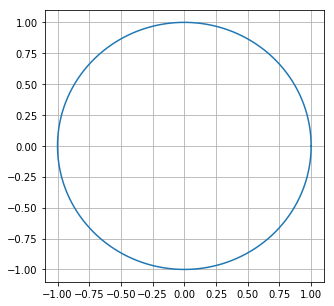

In [57]:
# ein Kreis um den Ursprung im Laborsystem
# c is the parameter of the function that will draw the circle
d = np.linspace(0, 2*np.pi, 10000)
# remember the pyhton variables are allready bound to the symbols y and z
y_coord = np.sin(d)
z_coord = np.cos(d)
fig = plt.figure(figsize=(5,5))
plt.plot(z_coord, y_coord)
plt.grid()

Nun werden die Punkte auf dem Kreis in das bewegte bezugssystem transformiert, dazu muss allerdings zunaechst v in die Matrix eingesetzt werden (also $gamma$ und $beta$ muessen durch den entsprechenden Ausdruck mit $\frac{v}{c}$ ersetzt werden und dann kann fuer die Koordinaten $x=t=0$ und fuer $y=$`y_coord` und $z=$`z_coord` eingesetzt werden. 

In [58]:
# damit die matrix effizient umgeformt werden kann muss erst eine kleine Funktion geschrieben werden
def substitute_in_matrix(matrix, substitutions, i, j):
    expr = matrix[i,j]
    for sym, sub_expr in zip(substitutions.keys(), substitutions.values()):
        expr = expr.subs(sym, sub_expr)
    return expr
# die funktion wird vom matrix konstruktor nur mit i und j als parameter aufgerufen und muss daher in einer lambda
# expression eingepackt werden
substitute_to_v = lambda i, j: substitute_in_matrix(L_z, {gamma:formulars[gamma], beta:formulars[beta]}, i, j)

In [59]:
# zunaechst wird die Matrix nach v/c umgestellt
L_z_reformulated = L_z.inv().applyfunc(lambda x: x.subs(gamma, formulars[gamma]).subs(beta, formulars[beta]))
L_z_reformulated

Matrix([
[1, 0,                                                                        0,                                                                        0],
[0, 1,                                                                        0,                                                                        0],
[0, 0,      -1/(-1/sqrt(1 - v_z**2/c**2) + v_z**2/(c**2*sqrt(1 - v_z**2/c**2))), v_z/(c*(-1/sqrt(1 - v_z**2/c**2) + v_z**2/(c**2*sqrt(1 - v_z**2/c**2))))],
[0, 0, v_z/(c*(-1/sqrt(1 - v_z**2/c**2) + v_z**2/(c**2*sqrt(1 - v_z**2/c**2)))),      -1/(-1/sqrt(1 - v_z**2/c**2) + v_z**2/(c**2*sqrt(1 - v_z**2/c**2)))]])

In [64]:
# nun muss noch c und v_z ein wert zugewiesen werden und wir koennen die koordinaten transformieren, wir verwenden
# dafuer wieder den substitutionsmechanismus den wir oben verwendet haben
speed_of_light = 300000000
fraction_of_c = 0.99
eval_L_z = L_z_reformulated.applyfunc(lambda x: x.subs(v_z, fraction_of_c*speed_of_light))
eval_L_z = eval_L_z.applyfunc(lambda x: x.subs(c, speed_of_light))
eval_L_z

Matrix([
[1, 0,                 0,                 0],
[0, 1,                 0,                 0],
[0, 0,  7.08881205008336, -7.01792392958253],
[0, 0, -7.01792392958253,  7.08881205008336]])

In [65]:
# nun wenden wir die Transformation an und kriegen den Kreis im relativ bewegten bezugssystem S'
y_coord_transformed = [(eval_L_z*Matrix([0, y_coord[i], z_coord[i], 0])).row(1) for i in range(len(y_coord))]
z_coord_transformed = [(eval_L_z*Matrix([0, y_coord[i], z_coord[i], 0])).row(2) for i in range(len(y_coord))]

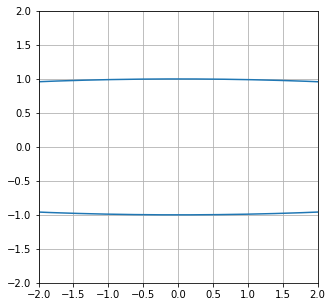

In [66]:
fig = plt.figure(figsize=(5,5))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.plot(z_coord_transformed, y_coord_transformed)
plt.grid()